## AYTM Assignment Question 1

#### Douglas Lee

Let's start with the most relevant python imports: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import requests
from datetime import datetime

Now we assign the variables needed as input for the API call. The API Key `openweathermap` first, followed by the approximate latitude (`lat`) and longitude (`lon`) for Philadelphia, the city we'll be evaluating.

In [2]:
openweathermap = '307be57c8f8f25379843c254acda625f'

lat = 39.95
lon = -75.17

Next, get the current time as a UNIX timestamp, truncated to the nearest integer, and decrement from this timestamp over the previous five days (and keep only those timestamps for the previous five days): 

In [3]:
right_now = int(datetime.now().timestamp())
times = np.arange(right_now, right_now-6*24*3600, -24*3600)[1:]

Next, we'll loop over each of the previous five days' timestamps `t` and make an API call to collect the hourly weather data (temperature and wind speed) for Philadelphia for each day into a dictionary `weather_dict`. We make sure to specify `metric` units in the API call to get temperature in °C and wind speed in m/s.

In [4]:
weather_dict = {}
for t in times:
    url = url = f'https://api.openweathermap.org/data/2.5/onecall/timemachine?lat={lat}&lon={lon}&dt={t}&appid={openweathermap}&units=metric'
    req = requests.get(url).json()
    for hr in req['hourly']:
        weather_dict[hr['dt']] = [hr['temp'], hr['wind_speed']]

We now convert the dictionary `weather_dict` into the dataframe `weather_df`, indexed by hourly timestamps over the previous five days, with columns for `Temperature` and `Wind Speed`, and convert the timestamps into more conventional `datetime` format.

In [5]:
weather_df = pd.DataFrame.from_dict(weather_dict, orient='index').sort_index()
weather_df.columns = ['Temperature', 'Wind Speed']
weather_df.index = [datetime.fromtimestamp(x) for x in weather_df.index]

Finally, we plot both the hourly `Temperature` and `Wind Speed` series over the previous five days.

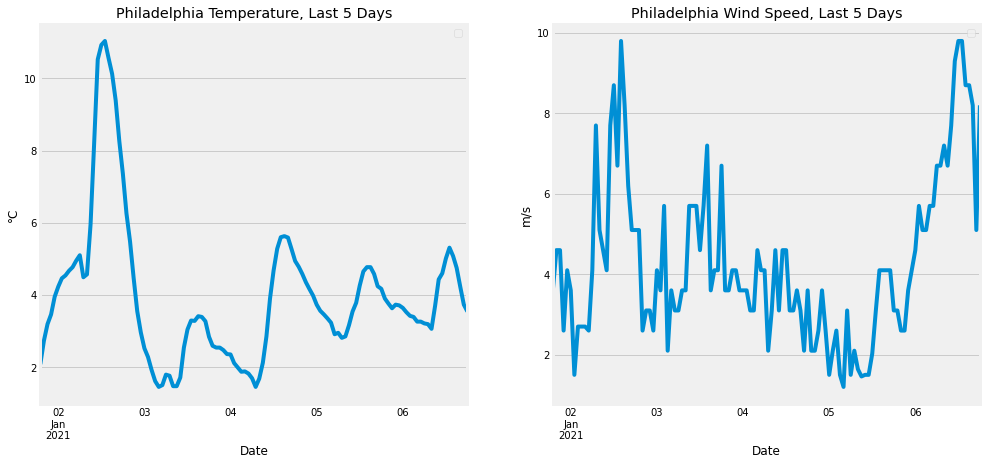

In [6]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
weather_df['Temperature'].plot()
plt.title('Philadelphia Temperature, Last 5 Days')
plt.xlabel('Date')
plt.ylabel('°C')
plt.legend([])

plt.subplot(1,2,2)
weather_df['Wind Speed'].plot()
plt.title('Philadelphia Wind Speed, Last 5 Days')
plt.xlabel('Date')
plt.ylabel('m/s')
plt.legend([]);